# Examen 1 : Cours A59 Apprentissage par renforcement
<br>
Nous allons lors de cet examen tester l'utilisation de Monte Carlo avec l'environnement CliffWalking.<br>

L'objectif sera d'appliquer Monte Carlo first visit et de vérifier que l'algorithme est capable de résoudre le problème.<br>

### Le plan est le suivant
1) Découvrir l'environnement et répondre à quelques questions théoriques ( 9 pts)<br>
2) Définir une politique (2pts)
3) Lancer la simulation et en tirer les conclusions (10 pts)
4) Ajouter epsilon à travers les itérations (4 pts)

<br>
Consignes:<br>

Vous devrez compléter le code la ou est présente la mention __# votre code__ <br>
Vous pouvez choisir d'implémenter différemment l'algortihme tant que vous utilisez Monte Carlo.<br>

Vous devrez également répondre aux questions là ou vous trouverez la mention __# votre réponse__<br>

Vous avez 3h00.<br>

Le total est de 25 points.<br>

__Merci de m'envoyer le notebook par MIO et en renommant le fichier avec votre nom__<br>

C'est un travail personnel.<br>

Les documents et TP sont permis.<br>
<br>
## Bonne chance !

# Chargement des librairies

In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import defaultdict
import time

In [2]:
print('ok')

ok


# Environnement

In [3]:
NUM_ITERATION = 5000
NUM_STEP=1000

## Cliffwalking

Le détail de l'environnement est accessible ici : https://gymnasium.farama.org/environments/toy_text/cliff_walking/

In [4]:
env = gym.make('CliffWalking-v0', render_mode="ansi") 

# env_test sera utilisé plus tard pour visualier le résultat
env_test = gym.make('CliffWalking-v0', render_mode="human") # ,render_mode="ansi")

___

### (1) Récupérer le nombre d'états possibles à l'aide la classe env et affecter cette valeur à la variable nombre_etat (1pt)

In [5]:
# nombre d'états
nombre_etat = env.observation_space.n
print(nombre_etat)

48


### __Question : combien avons nous d'état ?__<br>
__Votre réponse :__

___

### (2) Récupérer le nombre d'action possible à l'aide la classe env et affecter cette valeur à la variable nombre_action (1pt)

In [6]:
# nombre d'actions possibles

nombre_action = env.action_space.n
print(nombre_action)

4


### __Question : combien avons nous d'action ?__<br>
__Votre réponse :__

___

In [7]:
# La ligne suivante ne devrait pas générer d'erreur
assert nombre_action+nombre_etat == 52

### (3) Question : est ce un environnement épisodique ou continu ? (1 pts)
Votre réponse :

### (4) Question : est ce un environnement conforme aux critéres d'un processus de décision Markovien et pourquoi ? (3 pts)
Votre réponse :

### (5) Question : Pouvez vous décrire en quelques lignes le principe de l'algorithme Monte Carlo ? (1.5 pts)
Votre réponse :

In [8]:
L'agorlithme Monte Carlo est indépendant du modèle (ça veut dire, on ne connaît pas la dynamique de transitions)
Pour arriver à une bonne politique, l'algorithme s'améliore à chaque tour (episode). Il fonctionne par échantillonage
Plus que l'on joue, plus que l'on améliore la politque et on fini par convergir vers une politique optimale

SyntaxError: unterminated string literal (detected at line 1) (3983922663.py, line 1)

### (6) Question : Quelles sont les situations ou un algorithme Monte Carlo ne fonctionnera pas ? (1.5 points)

- Environnement non-episodique
- Si on ne peut pas faire assez d'échantillonage
- Environnement non-markovien
- La fin d'une episode est très long: le calcul de la récompense dépend de la fin de l'episode. 
Cela peut retarder le calcul de recompenses et, par conséquent, l'apprentissage

___

# (7) Fonctions utiles ( 2pts)

In [9]:
import numpy as np

def policy(Q, epsilon, state, pPrint=False):
    # Choisir une action au hasard si nous tirons un nombre aléatoire inférieur à epsilon,
    # sinon choisir la meilleure action gloutonne

    rand_num = np.random.random()
    
    # Choisir une action aléatoire avec probabilité epsilon
    if rand_num < epsilon:
        action = np.random.choice(range(len(Q[state])))  # Choisir parmi les actions possibles
    else:
        action = np.argmax(Q[state])  # Choisir l'action ayant la valeur Q maximale

    if pPrint:
        print(f'Sélection d\'action: {action}')

    return action


### ne devrait pas générer d'erreur mais cela peut varier avec votre version.
Donc donner juste à titre indicatif

In [10]:
np.random.seed(1) # valable si vous avez utilisé numpy pour générer les nombres aléatoires
assert policy([0,1,5,2],0,0) == 0 


In [11]:
np.random.seed(1) # valable si vous avez utilisé numpy pour générer les nombres aléatoires
env.action_space.seed(1)
assert policy([0,1,5,2],1,0)==1

TypeError: object of type 'int' has no len()

### Pas de modification nécessaire pour cette fonction

In [12]:
def generate_episode(Q,epsilon,num_timesteps):
    
    episode = []
    
    state = env.reset()[0]

    for t in range(num_timesteps):
        
        # Sélection d'une action en fonction de notre politique
        action = policy(Q,epsilon,state)
        
        # envoie de l'action à l'environnement pour retour (s_, r, done)
        next_state, reward, done, truncated, info = env.step(action)
        
        # stockage dans la liste du triplet (état, action, récompense)
        episode.append((state, action, reward))
        
        if done or truncated:
            break
            
        state = next_state

    return episode

---

# Lancons la simulation

### Définissons nos 3 tableaux numpy avec 2 dimensions état/action:<br>
__Q__ : fonction d'action valeur donc indexé sur les états et les actions par état. Attention à initialiser avec 0.0<br>
__total_return__ :  cumul par couple état/action des récompenses<br>
__N__ : comptage du nombre de passage par couple état/action choisie<br>

### début repère 1

### (8) Créer et initialiser les tableaux (1 pts)

In [13]:
# 
Q = np.zeros((nombre_etat, nombre_action))
total_return = ((nombre_etat, nombre_action))
N = ((nombre_etat, nombre_action))

### (9) écrivez le code manquant Monte Carlo __First visit__  (5 pts)

In [14]:
# condition FIXES du test
np.random.seed(1)
num_iterations = NUM_ITERATION
num_step = NUM_STEP
epsilon = 0.20
gamma = 1  # doit faciliter le calcul de G

# expérimentation
historique_duree_partie = []
historique_recompense = []

# Assurez-vous que Q et N sont initialisés correctement
Q = np.zeros((nombre_etat, nombre_action))  # Q-values initialized to zero
N = np.zeros((nombre_etat, nombre_action))  # Visit counts initialized to zero

for i in range(num_iterations):
    
    # on génére un épisode
    episode = generate_episode(Q, epsilon, num_step)
    
    # on stocker les pairs s,a de l'épisode
    all_state_action_pairs = [(s, a) for (s, a, r) in episode]
    
    # on stocke les récompense
    rewards = [r for (s, a, r) in episode]

    historique_duree_partie.append(len(episode))
    historique_recompense.append(np.sum(rewards))

    # en appliquant l'algorithme de Monte Carlo première visite, mettre à jour total_return, N et par calcul Q
    # Calculer le retour total G pour chaque état-action
    G = 0
    # On parcourt l'épisode à l'envers pour calculer le retour G
    for t in reversed(range(len(episode))):
        G = gamma * G + rewards[t]  # Mettre à jour le retour total
        state, action = all_state_action_pairs[t]  # Décomposer l'état et l'action
        
        # Si c'est la première visite de l'état-action
        if (state, action) not in all_state_action_pairs[:t]:
            # Mettre à jour Q(s, a) et le nombre de visites
            # Ici, on utilise directement l'état et l'action comme indices
            Q[state, action] += (G - Q[state, action]) / (N[state, action] + 1)  # Mise à jour de Q(s, a) avec le retour total G
            N[state, action] += 1  # Incrémenter le compteur de visites



---
### Affichons l'évolution de la durée des épisodes au fil de l'expérimentation et l'historique des récompenses

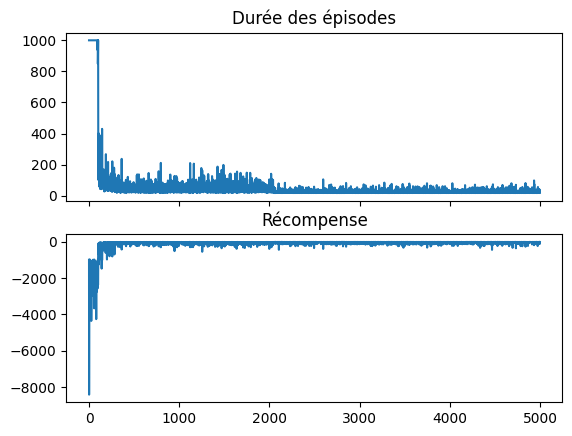

In [15]:
f ,(ax1,ax2) = plt.subplots(2,1,sharex=True)

ax1.set_title("Durée des épisodes")
ax1.plot(historique_duree_partie)

ax2.set_title("Récompense")
ax2.plot(historique_recompense)
plt.show()


### fin repère 1

## Vous devriez observer des courbes proches de celles ci dessous

![courbes](static/courbes.png)

### (10) Question : quelle est l'action recommandée par notre politique en position 36 ? Est ce correct ? (1 pt)
Votre réponse :

In [24]:
pos = 36
np.argmax(Q[pos])

np.int64(0)

In [28]:
print(env.render())

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x




### (11) Question : quelle est l'action recommandée par notre politique en position 35 ? Est ce correct ? (1 pt)
Votre réponse :

In [30]:
pos = 35
np.argmax(Q[pos])
print(env.render())

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x




### Affichons une simulation d'un épisode.
Note : si vous avez des difficultés à la version graphique, vous pouvez changer le mode render_mode="ansi" pour env_test et ajouter un print(env.render()) dans la boucle

#### Note il pourrait arriver que l'agent se bloque dans une colonne de la case gauche. Cela ne veut pas dire que votre algorithme n'a pas fonctionné mais nécessite plus d'entrainement.

__Solution : refaite un entrainement à partir de la section début repère 1__

In [31]:
state=env_test.reset()[0]
done=False
while not done:
    action=policy(Q,0,state)
    state,_,done,truncated,_ = env_test.step(action)
    print(env.render())
    time.sleep(0.5)

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x


o  o  

### (12) Question : Le petit homme prend il le chemin le plus court et pourquoi ? (2.0 pt)
Votre réponse :

---

---

## Copier le code compris entre les balises **début repère 1** et **fin repère 1** ci dessous.
## Notre approche e-greedy n'est pas complétement satisfaisante.
## Nous allons faire une décroissance d'espilon progressive.
### (13) Modifier le code pour faire évoluer epsilon de 0.90 à 0.05 selon un nombre d'éspisode que je vous laisse apprécier et relancer l'expérimentation. (3 pts)


In [21]:
# 
Q = np.zeros((nombre_etat, nombre_action))
total_return = ((nombre_etat, nombre_action))
N = ((nombre_etat, nombre_action))

In [32]:
# condition FIXES du test
np.random.seed(1)

num_iterations = NUM_ITERATION
num_step = NUM_STEP

#num_iterations = 500
#num_step = 500

epsilon = 0.90

# limite inférieure
epsilon_min = 0.05

# taux de décroissance 
epsilon_decay_rate = (epsilon - epsilon_min) / num_iterations  # Linear decay rate

gamma = 1  # doit faciliter le calcul de G

# expérimentation
historique_duree_partie = []
historique_recompense = []

# Assurez-vous que Q et N sont initialisés correctement
Q = np.zeros((nombre_etat, nombre_action))  # Q-values initialized to zero
N = np.zeros((nombre_etat, nombre_action))  # Visit counts initialized to zero

for i in range(num_iterations):
    
    # on génére un épisode
    episode = generate_episode(Q, epsilon, num_step)
    
    # on stocker les pairs s,a de l'épisode
    all_state_action_pairs = [(s, a) for (s, a, r) in episode]
    
    # on stocke les récompense
    rewards = [r for (s, a, r) in episode]

    historique_duree_partie.append(len(episode))
    historique_recompense.append(np.sum(rewards))

    # en appliquant l'algorithme de Monte Carlo première visite, mettre à jour total_return, N et par calcul Q
    # Calculer le retour total G pour chaque état-action
    G = 0
    # On parcourt l'épisode à l'envers pour calculer le retour G
    for t in reversed(range(len(episode))):
        G = gamma * G + rewards[t]  # Mettre à jour le retour total
        state, action = all_state_action_pairs[t]  # Décomposer l'état et l'action
        
        # Si c'est la première visite de l'état-action
        if (state, action) not in all_state_action_pairs[:t]:
            # Mettre à jour Q(s, a) et le nombre de visites
            # Ici, on utilise directement l'état et l'action comme indices
            Q[state, action] += (G - Q[state, action]) / (N[state, action] + 1)  # Mise à jour de Q(s, a) avec le retour total G
            N[state, action] += 1  # Incrémenter le compteur de visites

   

    # Réduire epsilon progressivement, mais ne pas aller en-dessous de epsilon_min
    epsilon = max(epsilon_min, epsilon - epsilon_decay_rate)
    

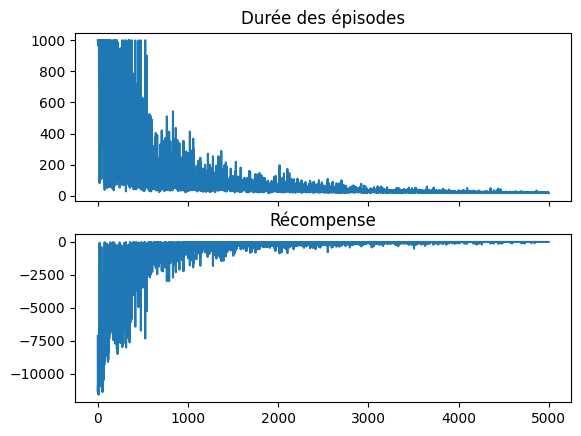

In [33]:
f ,(ax1,ax2) = plt.subplots(2,1,sharex=True)

ax1.set_title("Durée des épisodes")
ax1.plot(historique_duree_partie)

ax2.set_title("Récompense")
ax2.plot(historique_recompense)
plt.show()


Vous devriez obtenir des courbes prochent de celles ci (peut varier)

![courbes](static/courbes_decay.png)

### (14) Question : pourquoi la partie gauche des courbes est elle plus épaisse qu'avec une valeur d'epsilon fixe ? (1 pt)

votre résponse


Au début, on fait plus d'exploration que si on avait l'epsilon = 0.2 .
À la mesure que epsilon se réduit, on privilegie l'eploitation. Comme l'epsilon devient dynamique, il arrivera à être plust petit que la valeur initiale (0.2) et on privilegiera l'exploitation

#

# Ne pas oublier de m'envoyer le notebook par MIO !